In [1]:
# Importing base libraries for analysis
import numpy as np
import pandas as pd

import sqlite3

import seaborn as sns

In [2]:
sqlite3.sqlite_version

'3.37.2'

# Data Generation for Analysis

In [3]:
# Start creating the 'parcel_aggr' dataset and creating the 'parcel_id' column
parcel_aggr = pd.DataFrame({'parcel_id': range(100)})

In [4]:
# Creating the 'accept_date' column
parcel_aggr['accept_date'] = pd.Series(pd.date_range(start='2022-04-01'
                                                    , end='2022-04-30'))\
                                        .sample(100, replace=True, random_state=42)\
                                .values

parcel_aggr.accept_date = pd.to_datetime(parcel_aggr.accept_date, format='%Y-%m-%d')

In [5]:
# Creating the 'index_id' column
parcel_aggr['index_id'] = pd.Series(range(10))\
                            .sample(100, replace=True, random_state=42)\
                            .values

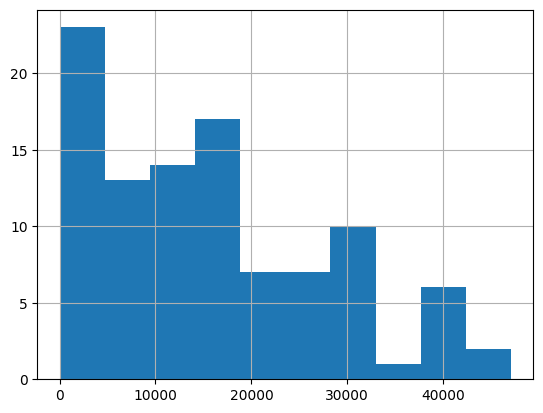

In [6]:
np.random.seed(42)
pd.Series(np.abs(np.random.normal(10000, 20000, size=100))).hist();

In [7]:
# Creating the 'weight' column
np.random.seed(42)
parcel_aggr['weight'] = np.round(np.abs(np.random.normal(10000
                                                        , 20000
                                                        , size=100)))\
                            .astype(int)

In [8]:
# Creating the 'price' column
np.random.seed(42)
parcel_aggr['price'] = np.round(np.abs(np.random.normal(10000
                                                        , 20000
                                                        , size=100)))\
                            .astype(int)

In [9]:
# Creating the 'client_type' column
parcel_aggr['client_type'] = pd.Series(['individual'
                                        , 'legal'])\
                                .sample(100, replace=True, random_state=42)\
                                .values

In [10]:
# Checking for unique the postcode
parcel_aggr.index_id.unique()

array([6, 3, 7, 4, 9, 2, 5, 1, 0, 8], dtype=int64)

In [11]:
# Checking distributions of values across postcode
parcel_aggr.index_id.value_counts()

7    15
8    12
6    11
9    11
4    10
1    10
3     9
2     9
0     7
5     6
Name: index_id, dtype: int64

In [12]:
parcel_aggr

,parcel_id,accept_date,index_id,weight,price,client_type
0,0,2022-04-07,6,19934,19934,individual
1,1,2022-04-20,3,7235,7235,legal
2,2,2022-04-29,7,22954,22954,individual
3,3,2022-04-15,4,40461,40461,individual
4,4,2022-04-11,6,5317,5317,individual
...,...,...,...,...,...,...
95,95,2022-04-29,9,19270,19270,legal
96,96,2022-04-18,8,15922,15922,legal
97,97,2022-04-26,6,15221,15221,legal
98,98,2022-04-12,8,10102,10102,legal


In [13]:
# Start creating the 'index_data' dataset and creating the 'index_id' column
index_data = pd.DataFrame({'index_id': range(10)})

In [14]:
# Creating the 'aria' column
index_data['area'] = ['Boston', 'Portland', 'Providence', 'Hartford'
                      , 'New York', 'Newark', 'Buffalo', 'Albany'
                      , 'Philadelphia', 'Baltimore']

In [15]:
# Creating the 'population' column
index_data['population'] = [654776, 641162, 189692, 120576
                            , 8467513, 307220, 276807
                            , 98617, 1603797, 576498]

In [16]:
index_data

,index_id,area,population
0,0,Boston,654776
1,1,Portland,641162
2,2,Providence,189692
3,3,Hartford,120576
4,4,New York,8467513
5,5,Newark,307220
6,6,Buffalo,276807
7,7,Albany,98617
8,8,Philadelphia,1603797
9,9,Baltimore,576498


In [17]:
# Creating a database
con = sqlite3.connect('db')
cur = con.cursor()

In [18]:
# Putting dataframes into a database
parcel_aggr.to_sql('parcel_aggr', con, if_exists='replace', index=False)
index_data.to_sql('index_data', con, if_exists='replace', index=False)

10

In [19]:
# Creating a function to select a query
def select(sql):
    return pd.read_sql(sql, con)

# Data Analysis

In [20]:
# Checking 'parcel_aggr' data from database
sql = ''' select *
          from parcel_aggr '''

select(sql)

,parcel_id,accept_date,index_id,weight,price,client_type
0,0,2022-04-07 00:00:00,6,19934,19934,individual
1,1,2022-04-20 00:00:00,3,7235,7235,legal
2,2,2022-04-29 00:00:00,7,22954,22954,individual
3,3,2022-04-15 00:00:00,4,40461,40461,individual
4,4,2022-04-11 00:00:00,6,5317,5317,individual
...,...,...,...,...,...,...
95,95,2022-04-29 00:00:00,9,19270,19270,legal
96,96,2022-04-18 00:00:00,8,15922,15922,legal
97,97,2022-04-26 00:00:00,6,15221,15221,legal
98,98,2022-04-12 00:00:00,8,10102,10102,legal


In [21]:
# Checking 'index_data' data from database
sql = ''' select *
          from index_data '''

select(sql)

,index_id,area,population
0,0,Boston,654776
1,1,Portland,641162
2,2,Providence,189692
3,3,Hartford,120576
4,4,New York,8467513
5,5,Newark,307220
6,6,Buffalo,276807
7,7,Albany,98617
8,8,Philadelphia,1603797
9,9,Baltimore,576498


### Finding the average postage and average parcel weight of each postcode

In [22]:
sql = ''' select index_id
            , count(index_id) as cnt
            , round(avg(price), 2) as price_avg
            , round(avg(weight), 2) as weight_avg
          from parcel_aggr
          group by index_id '''

select(sql)

,index_id,cnt,price_avg,weight_avg
0,0,7,11164.00,11164.00
1,1,10,13596.00,13596.00
2,2,9,24729.00,24729.00
3,3,9,10928.11,10928.11
4,4,10,21651.00,21651.00
5,5,6,12980.17,12980.17
6,6,11,15031.64,15031.64
7,7,15,16841.00,16841.00
8,8,12,11452.17,11452.17
9,9,11,16969.09,16969.09


### Displaying the number of postal parcels broken down by postcode the weight of which is more than 10 kg

In [23]:
sql = ''' select index_id
            , count(index_id) as cnt
          from parcel_aggr
          where weight >= 10000
          group by index_id '''

select(sql)

,index_id,cnt
0,0,4
1,1,7
2,2,9
3,3,3
4,4,6
5,5,3
6,6,7
7,7,9
8,8,7
9,9,8


In [24]:
# Finding the total number of postal parcels and displaying the percentage
sql = ''' select index_id
            , count(1) as cnt_total
            , count(case 
                        when weight >= 10000 then 1
                        else null end) as cnt_10kg
            , round(count(case
                            when weight >= 10000 then 1
                            else null end) * 1.0 / count(1), 2) as pct_total_per_10kg
          from parcel_aggr
          group by index_id '''

select(sql)

,index_id,cnt_total,cnt_10kg,pct_total_per_10kg
0,0,7,4,0.57
1,1,10,7,0.70
2,2,9,9,1.00
3,3,9,3,0.33
4,4,10,6,0.60
5,5,6,3,0.50
6,6,11,7,0.64
7,7,15,9,0.60
8,8,12,7,0.58
9,9,11,8,0.73


### Displaying the number of postal parcels by type of client and population group of the locality where the parcel was accepted

In [25]:
# Creating a list for a population group
population_group = {'lowest': (0,100000)
                    , 'middlest': (100001, 500000)
                    , 'largest': (500001, 1000000)
                    , 'hugest': (1000001, float('inf'))}

In [26]:
# Finding the number of postal parcels by client type and population group
sql = ''' select par.client_type
            , population
            , case
                when ind.population <= 100000 then 'lowest'
                when ind.population <= 500000 then 'middlest'
                when ind.population <= 1000000 then 'largest'
                else 'hugest' end as population_group
            , count(1) as num_parcels
          from parcel_aggr as par
          left join index_data as ind
                using(index_id)
          group by par.client_type
            , population_group
          order by par.client_type
            , ind.population '''

select(sql)

,client_type,population,population_group,num_parcels
0,individual,98617,lowest,11
1,individual,276807,middlest,17
2,individual,641162,largest,11
3,individual,8467513,hugest,5
4,legal,98617,lowest,4
5,legal,120576,middlest,18
6,legal,576498,largest,17
7,legal,8467513,hugest,17


### Finding IDs of parcels, the weight of which is strictly greather than the average in the database

In [27]:
sql = ''' select parcel_id
          from parcel_aggr
          where weight > (select avg(weight) as weight_avg
                          from parcel_aggr) '''

select(sql)

,parcel_id
0,0
1,2
2,3
3,6
4,7
5,9
6,13
7,14
8,17
9,19


### Displaying IDs of parcels, the area, the population of the locality and the cost of sending the parcel with the maximum weight in the each post office

In [28]:
sql = ''' select sub.parcel_id
            , sub.area
            , sub.population
            , sub.price
          from (select *
                    , ind.population
                    , ind.area
                    , rank() over (partition by par.index_id
                                    order by par.weight desc) as rnk
                from parcel_aggr as par
                left join index_data as ind
                    using(index_id)) as sub
          where sub.rnk = 1 '''

select(sql)

,parcel_id,area,population,price
0,91,Boston,654776,29373
1,64,Portland,641162,26251
2,31,Providence,189692,47046
3,47,Hartford,120576,31142
4,73,New York,8467513,41293
5,14,Newark,307220,24498
6,37,Buffalo,276807,29193
7,74,Albany,98617,42395
8,79,Philadelphia,1603797,29751
9,65,Baltimore,576498,37125


In [29]:
# Checking on some 'index_id' postcode where the parcel was accepted
sql = ''' select par.parcel_id
            , par.index_id
            , par.weight
            , par.price
            , ind.area
          from parcel_aggr as par
          left join index_data as ind
            using(index_id)
          where par.index_id = 5
          order by par.weight desc
          limit 1 '''

select(sql)

,parcel_id,index_id,weight,price,area
0,14,5,24498,24498,Newark


### Make the distribution of the number of postal parcels according to the cost of sending

In [30]:
# Price distribution
parcel_aggr.price.describe()

count      100.000000
mean     15714.620000
std      11994.748976
min         35.000000
25%       5317.000000
50%      14057.000000
75%      24565.750000
max      47046.000000
Name: price, dtype: float64

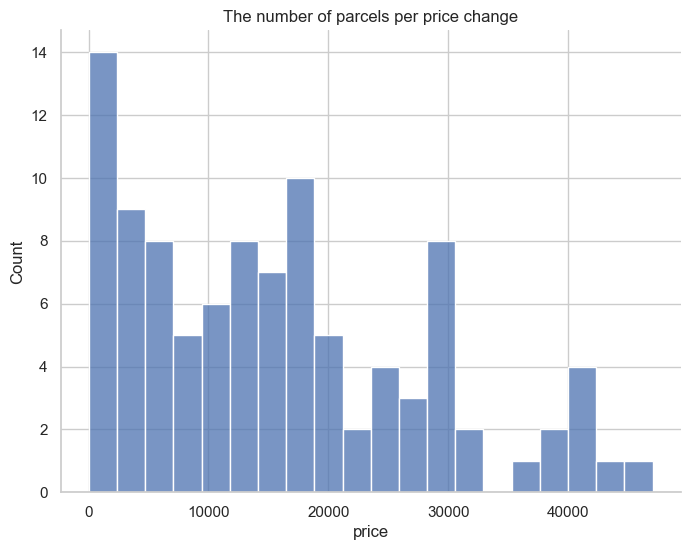

In [31]:
# Setting figure size for future visualizations
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

# Looking at the number of percels per price change
ax = sns.histplot(parcel_aggr.price, bins=20)
ax.set(title='The number of parcels per price change')
sns.despine()

In [32]:
# Creatting the price category
parcel_aggr['price_category'] = pd.cut(parcel_aggr.price, 10)

# Looking at the number of parcels of the price category
price_bin = parcel_aggr.groupby('price_category')['parcel_id'].count()

price_bin

price_category
(-12.011, 4736.1]     23
(4736.1, 9437.2]      13
(9437.2, 14138.3]     14
(14138.3, 18839.4]    17
(18839.4, 23540.5]     7
(23540.5, 28241.6]     7
(28241.6, 32942.7]    10
(32942.7, 37643.8]     1
(37643.8, 42344.9]     6
(42344.9, 47046.0]     2
Name: parcel_id, dtype: int64

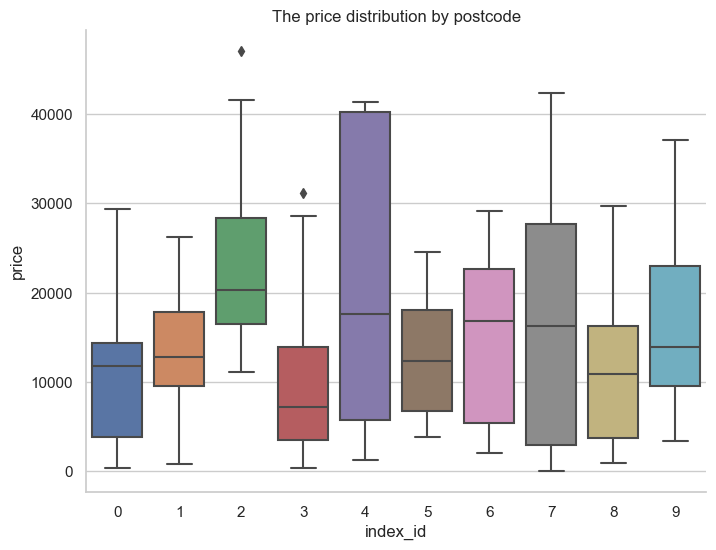

In [33]:
# Looking the price boxplot distribution by postcode
ax = sns.boxplot(data=parcel_aggr
                 , x='index_id'
                 , y='price')
ax.set(title='The price distribution by postcode')
sns.despine()

*As you can see, most parcels are concentrated in the low price category. It can be concluded that due to the normal distribution of data, postal companies will most often have parcels of lower price. The average postage price for postal codes will be about $16,000.*